In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger le dataset depuis le fichier CSV
file_name = 'BetterLifeIndex.csv'
file_name2 = 'BetterLifeIndexNum.csv'
file_name3 = 'BetterLifeIndexNormalized.csv'
data = pd.read_csv(file_name)

data.select_dtypes(include=['float64', 'int64']).to_csv(file_name2, index=False)
num_data = pd.read_csv(file_name2)

# on remplace les données NA par la moyenne de la colonne
num_data = num_data.fillna(num_data.mean())

normalized_data = pd.read_csv(file_name3)


lien vers la database: https://www.oecd-ilibrary.org/social-issues-migration-health/data/oecd-social-and-welfare-statistics/better-life-index-edition-2022_a4815531-en

Explication des différentes données présentes.

- Household net adjusted disposable income INC : Revenu disponible ajusté des ménages.
- Household net wealth WEA : Richesse nette des ménages.
- Employment rate : Taux d'emploi.
- Personal earnings LTE : Revenus personnels.
- Quality of support network PER : Qualité du réseau de soutien.
- Educational attainment EDU : Niveau de formation atteint.
- Student skills SKI : Compétences des étudiants.
- Years in education YED : Années passées dans l'éducation.
- Water quality WQU : Qualité de l'eau.
- Voter turnout VOL : Participation électorale.
- Self-reported health SRE : État de santé auto-déclaré.
- Feeling safe walking alone at night ASR : Sentiment de sécurité en marchant seul la nuit.

# distribution de chaque variables

On effectue une distribution sur les données en les affichant sous forme d'histogramme.

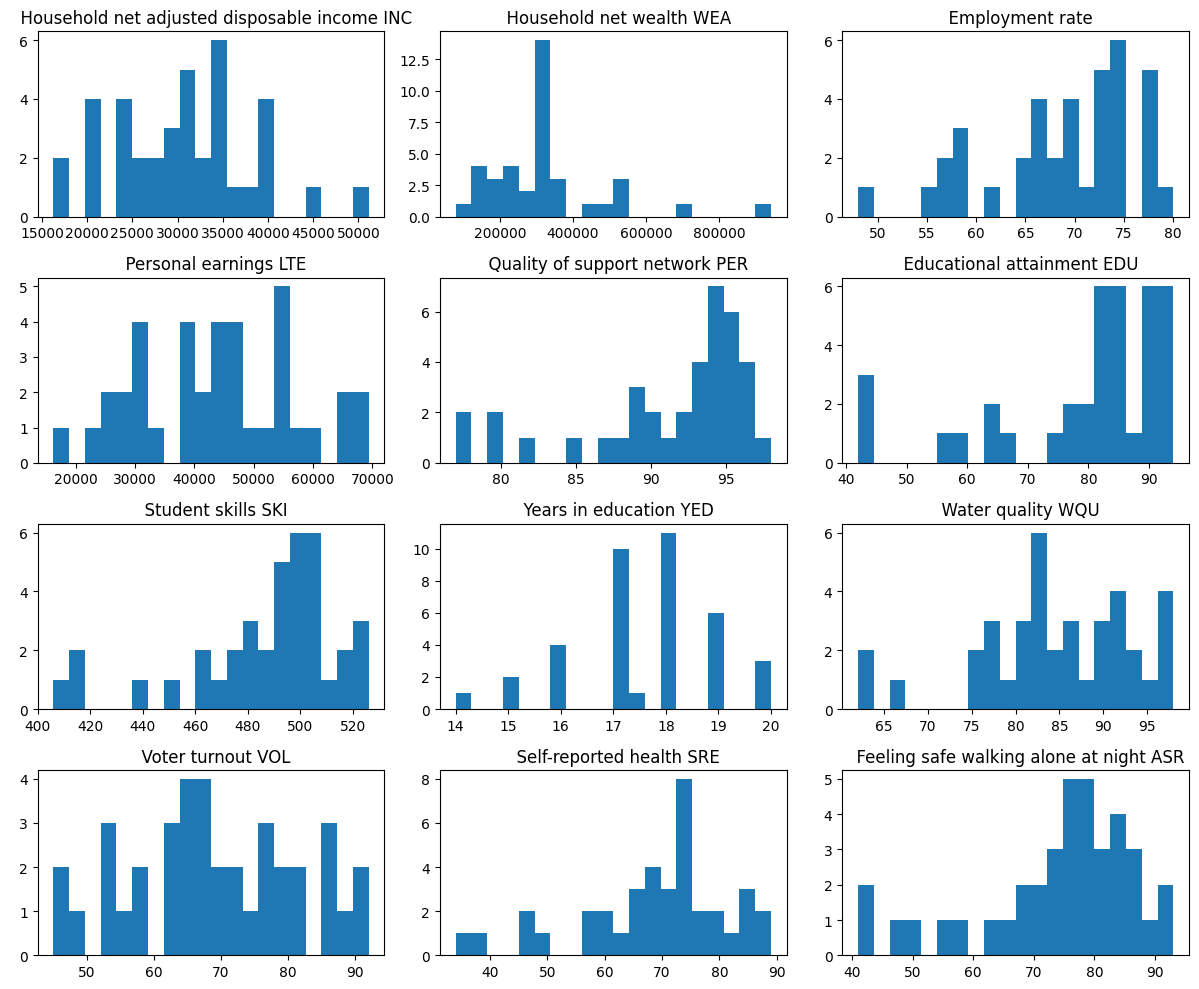

In [96]:
num_data.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()

# Normaliser les données

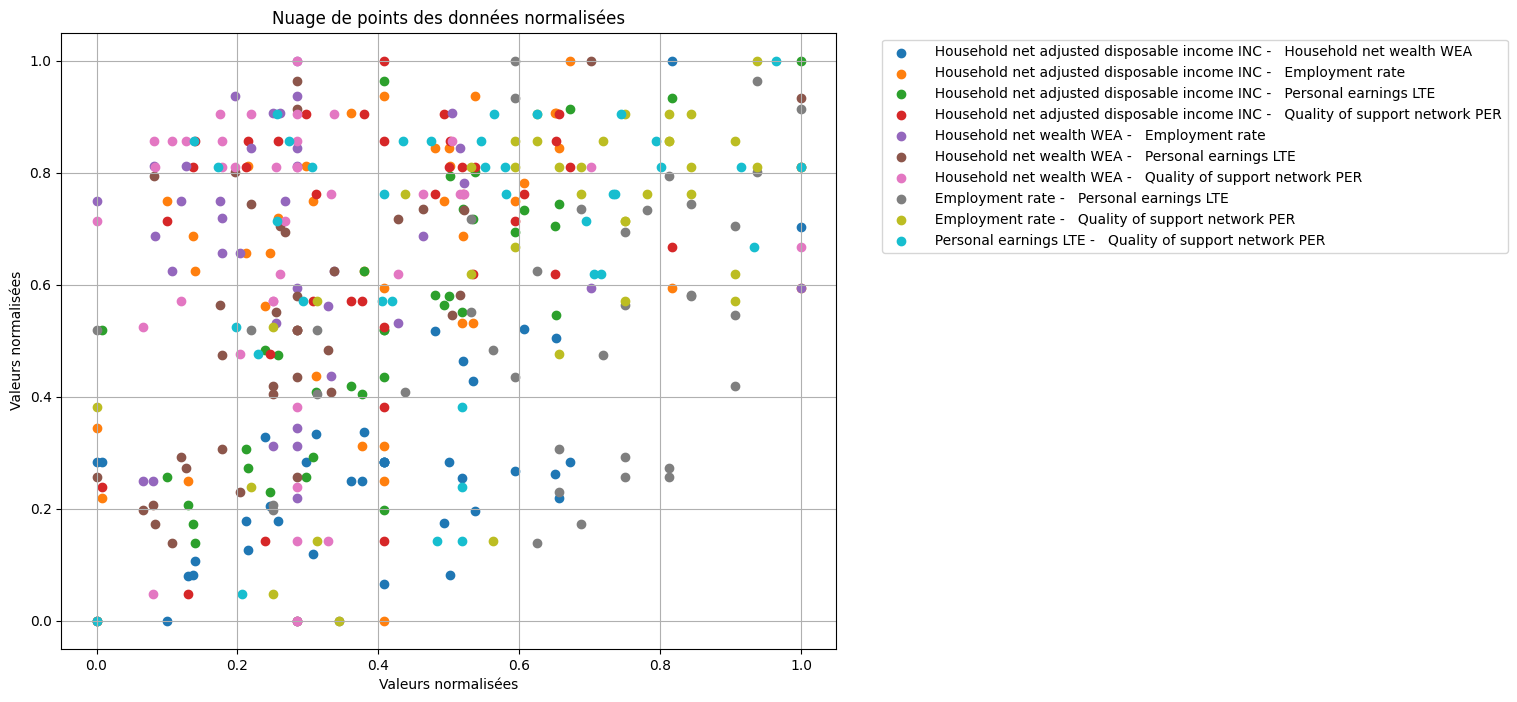

In [97]:

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les données
num_data_normalized = scaler.fit_transform(num_data)

# Créer un nouveau DataFrame avec les données normalisées
num_data_normalized = pd.DataFrame(num_data_normalized, columns=num_data.columns)

BetterLifeIndexNormalized = 'BetterLifeIndexNormalized.csv'
num_data_normalized.to_csv(BetterLifeIndexNormalized, index=False)

plt.figure(figsize=(10, 8))

# Liste des colonnes pour le nuage de points
colonnes = num_data_normalized.columns[:5]

# Création des nuages de points pour chaque paire de colonnes
for i in range(len(colonnes)):
    for j in range(i+1, len(colonnes)):
        plt.scatter(num_data_normalized[colonnes[i]], num_data_normalized[colonnes[j]], label=f'{colonnes[i]} - {colonnes[j]}')

plt.xlabel('Valeurs normalisées')
plt.ylabel('Valeurs normalisées')
plt.title('Nuage de points des données normalisées')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

En appliquant la normalisation Min-Max, j'ai redimensionné les valeurs de chaque variable pour qu'elles se situent dans une plage allant de 0 à 1.

Cette étape permet de garantir que chaque variable soit exprimée dans une plage commune et comparable

Par soucis de visibilitée, j'ai choisi d'afficher sur le schéma ci-dessus uniquement les 5 premieres colonnes

# matrice de corrélation

La normalisation des données avant la création d'une matrice de corrélation assure des mesures justes et comparables entre les variables, évitant les biais liés aux échelles différentes. Elle garantit des évaluations précises des relations et facilite l'interprétation des corrélations, essentielle pour des analyses robustes et fiables.

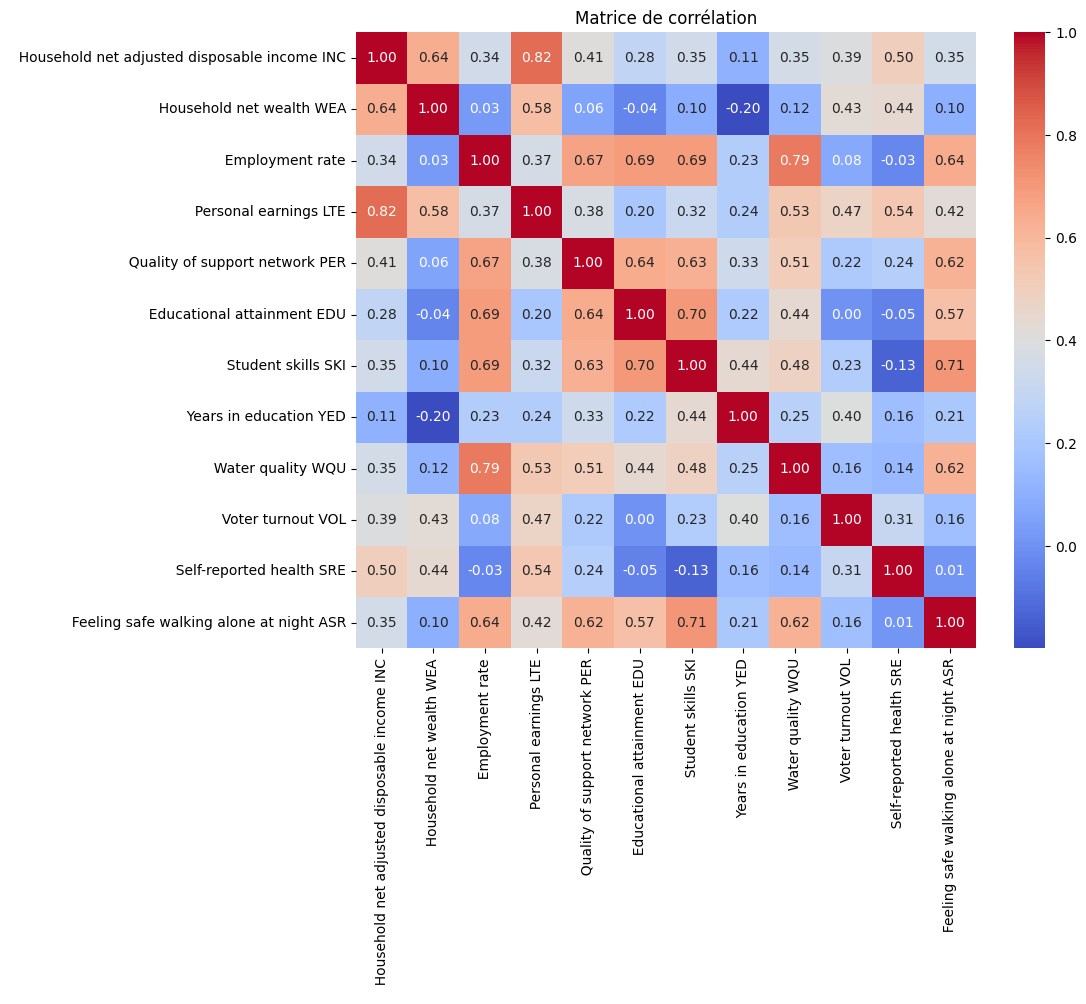

In [98]:
# Calculer la matrice de corrélation
matrice = num_data_normalized.corr()

# Créer un heatmap à partir de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(matrice, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()



cette matrice de corrélation nous permet de comprendre les relations entre les variables: 
  plus la couleur est proche de l'extrémité chaude ou froide de l'échelle, plus la corrélation est forte, tandis que des couleurs plus neutres indiquent une corrélation plus faible.

Ici par exemple, on peut persevoir une forte correlation positive entre le revenu disponible ajusté des ménages et les revenus personnels.
A contrario, il existe une forte correlation négative entre la richesse nette des ménages et les années passées dans l'éducation
  

# ACP sur les données normalisées

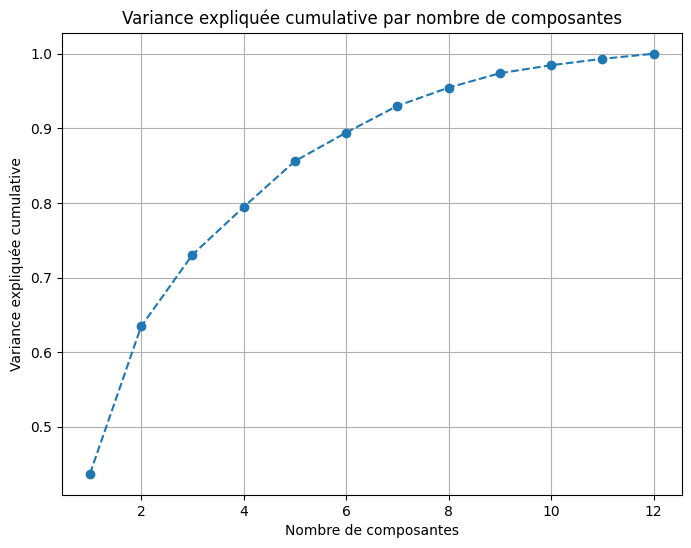

In [99]:

# Supprimer les lignes contenant des valeurs manquantes
normalized_data.dropna(inplace=True)

# Appliquer l'ACP
pca = PCA()
components = pca.fit_transform(normalized_data)

# Tracé du graphique de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.title('Variance expliquée cumulative par nombre de composantes')
plt.grid(True)
plt.show()

La progression en variance expliquée cumulative dans l'ACP, partant d'une faible explication initiale pour monter rapidement, suggère que les premières composantes captent des tendances significatives concernant la diversité socio-écologique des données. Cette augmentation rapide suggère que quelques composantes révèlent des aspects saillants tels que la variabilité des revenus, du niveau d'éducation, de la santé et de la sécurité perçue, tandis que l'inclusion de composantes supplémentaires révèle des variations plus spécifiques ou locales au sein de ces catégories socio-économiques et environnementales.

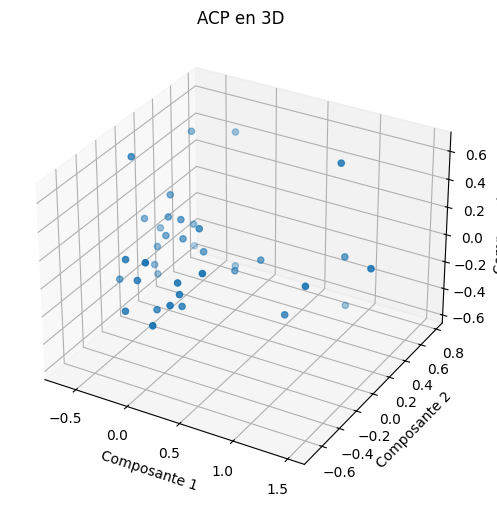

In [100]:

pca = PCA(n_components=3)
components = pca.fit_transform(normalized_data)

# Tracé du graphique en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Affichage des données
ax.scatter(components[:, 0], components[:, 1], components[:, 2], marker='o')

# Étiquetage des axes
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
ax.set_title('ACP en 3D')
plt.show()


L'objectif principal de l'ACP est de réduire la dimensionnalité d'un ensemble de données en projetant ces données dans un nouvel espace de dimensions réduites.

Les points représentent les observations projetées dans l'espace des composantes principales.

La dispersion élevée des points dans l'ACP suggère une diversité importante des ménages en termes de revenus, de richesse, de niveau d'éducation, de compétences étudiantes, de santé autodéclarée et de sécurité ressentie. Ces observations distantes peuvent refléter des différences marquées dans la participation électorale, la qualité de l'eau, le soutien social et l'emploi, mettant en lumière la variabilité substantielle au sein de ces catégories socio-économiques.

# Clustering

Je commence par chercher le nombre de cluster pour déterminer le nombre optimal de clusters pour une Analyse en Composantes Principales (ACP)

In [101]:
range_n_clusters = range(2, 21)
inertias = []
silhouette_scores = []
plt.figure(figsize=(12, 4))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(components)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    if n_clusters > 1:  # La silhouette n'est calculée que si n_clusters > 1
        silhouette_avg = silhouette_score(components, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)


<Figure size 1200x400 with 0 Axes>

La méthode du coude

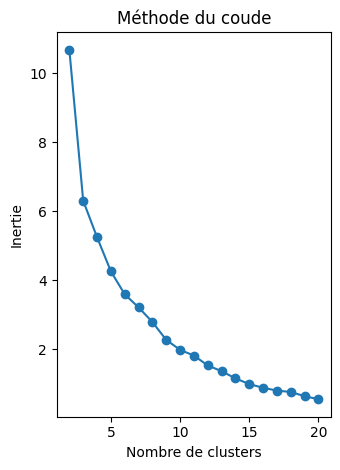

In [102]:

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

plt.tight_layout()
plt.show()


La méthode du coude est une approche visuelle pour déterminer le nombre optimal de clusters en analysant le graphique de l'inertie.

Il faut rechercher un point sur le graphique où l'inertie cesse de diminuer brusquement et commence à s'aplatir. Ce point est souvent appelé le "coude".

Ici: environ vers la valeur 5.

Etant peu clair, je mets au point une autre méthode: La méthode de la silhouette

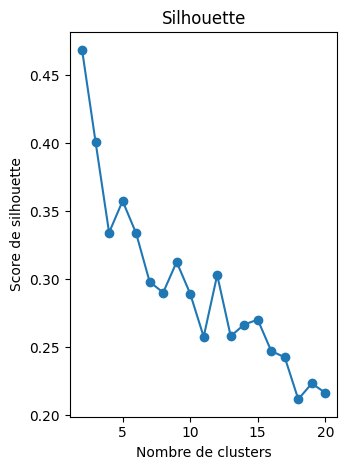

In [103]:

# Silhouette
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Silhouette')

plt.tight_layout()
plt.show()


Un score de silhouette proche de 1 indique des clusters bien définis, tandis qu'un score négatif ou proche de 0 suggère des chevauchements entre les clusters.

Ici: La valeur 5 aussi.

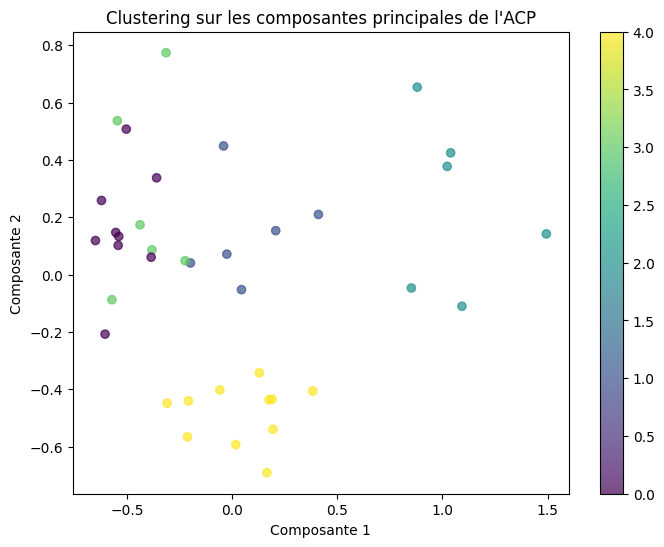

In [104]:
pca = PCA(n_components=3)
components = pca.fit_transform(normalized_data)

# Appliquer K-Means sur les composantes principales
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(components)
labels = kmeans.labels_

# Visualiser les clusters dans l'espace de l'ACP
plt.figure(figsize=(8, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Légende et titres
plt.colorbar(scatter)
plt.title('Clustering sur les composantes principales de l\'ACP')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

le Clustering va créer des classes et classer les éléments en fonction de leurs ressemblances.

Cette visualisation permet de voir comment les clusters sont distribués dans l'espace défini par les deux premières composantes de l'ACP.